# Import Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import joblib
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Directory Paths

In [2]:
# Set the paths to the directories containing the face images
stroke_dir = 'data/stroke_data'
non_stroke_dir = 'data/no_stroke_data'

# Load and Preprocess Images Function

In [3]:
# Load and preprocess the images, and then display them
def load_preprocess_images(image_dir, label):
    images = []
    labels = []

    # Load and preprocess the images
    file_list = os.listdir(image_dir)
    for filename in tqdm(file_list, desc="Preprocessing Images in " + image_dir):
        img = cv2.imread(os.path.join(image_dir, filename))
        if img is not None:  # Check if the image file was successfully read
            img = cv2.resize(img, (224, 224))
            img = preprocess_input(img)
            images.append(img)
            labels.append(label)

    return images, labels

# Load and Preprocess Images

In [4]:
#Load and Preprocess Images
stroke_images, stroke_labels = load_preprocess_images(stroke_dir, 1)
non_stroke_images, non_stroke_labels = load_preprocess_images(non_stroke_dir, 0)

Preprocessing Images in data/no_stroke_data: 100%|███████████████████████████████████| 555/555 [00:20<00:00, 27.14it/s]


# Combine Images and Labels

In [5]:
# Combine all images and corresponding labels
images = np.concatenate([stroke_images, non_stroke_images])
labels = np.concatenate([stroke_labels, non_stroke_labels])


# Flatten Images

In [6]:
# Flatten the images
images = np.array(images)
features = images.reshape(images.shape[0], -1)

# Train-Test Split

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define Gradient Boosting Classifier Model

In [8]:
# Define the Gradient Boosting Classifier model
gradient_boosting = GradientBoostingClassifier(n_estimators=40, validation_fraction=0.2, n_iter_no_change=5, verbose=1)

# Train the Model

In [9]:
# Train the model 
best_accuracy = -1
with tqdm(total=gradient_boosting.n_estimators, desc="Training Model") as pbar:
    for i in range(gradient_boosting.n_estimators):
        gradient_boosting.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = gradient_boosting.predict(X_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Update progress bar
        pbar.set_postfix({'Accuracy': accuracy})
        pbar.update(1)

        # Save the model if it has the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            joblib.dump(gradient_boosting, 'stroke_detection_model.pkl')

Training Model:   0%|                                                                           | 0/40 [00:00<?, ?it/s]

      Iter       Train Loss   Remaining Time 
         1           1.3022           18.57m
         2           1.2254           17.97m
         3           1.1577           17.44m
         4           1.0993           16.88m
         5           1.0416           16.42m
         6           0.9957           15.95m
         7           0.9515           15.50m
         8           0.9055           15.07m
         9           0.8693           14.63m
        10           0.8316           14.13m
        20           0.5752            9.42m
        30           0.4105            4.69m


Training Model:   2%|█▏                                             | 1/40 [18:49<12:14:12, 1129.54s/it, Accuracy=0.81]

        40           0.3047            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2994           18.86m
         2           1.2323           18.32m
         3           1.1608           18.00m
         4           1.1008           18.02m
         5           1.0495           17.62m
         6           1.0001           16.93m
         7           0.9522           16.41m
         8           0.9121           15.76m
         9           0.8757           15.15m
        10           0.8365           14.62m
        20           0.5677            9.60m
        30           0.4054            4.75m


Training Model:   5%|██▎                                           | 2/40 [34:31<10:45:19, 1018.93s/it, Accuracy=0.815]

      Iter       Train Loss   Remaining Time 
         1           1.3005           17.51m
         2           1.2225           17.40m
         3           1.1616           16.80m
         4           1.0931           16.37m
         5           1.0431           15.91m
         6           0.9905           15.68m
         7           0.9489           15.27m
         8           0.9039           14.92m
         9           0.8627           14.44m
        10           0.8257           14.04m
        20           0.5470            9.39m
        30           0.3795            4.70m


Training Model:   8%|███▌                                           | 3/40 [51:24<10:26:46, 1016.40s/it, Accuracy=0.82]

      Iter       Train Loss   Remaining Time 
         1           1.2981           18.20m
         2           1.2247           18.19m
         3           1.1557           17.60m
         4           1.1014           17.07m
         5           1.0471           16.51m
         6           0.9968           15.97m
         7           0.9542           15.49m
         8           0.9049           15.04m
         9           0.8620           14.58m
        10           0.8285           14.04m
        20           0.5654            9.34m
        30           0.4022            4.67m


Training Model:  10%|████▌                                        | 4/40 [1:10:00<10:33:26, 1055.74s/it, Accuracy=0.81]

        40           0.3024            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2917           17.75m
         2           1.2141           17.31m
         3           1.1550           16.84m
         4           1.0921           16.52m
         5           1.0364           16.21m
         6           0.9925           15.84m
         7           0.9441           15.42m
         8           0.8964           14.98m
         9           0.8579           14.55m
        10           0.8205           14.12m
        20           0.5574            9.38m
        30           0.3982            4.69m


Training Model:  12%|█████▌                                      | 5/40 [1:28:46<10:30:34, 1081.00s/it, Accuracy=0.815]

        40           0.2963            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3062           18.78m
         2           1.2334           18.27m
         3           1.1794           17.78m
         4           1.1211           17.31m
         5           1.0676           16.70m
         6           1.0173           16.22m
         7           0.9726           15.71m
         8           0.9317           15.25m
         9           0.8908           14.85m
        10           0.8501           14.43m
        20           0.5789            9.81m
        30           0.4170            4.84m


Training Model:  15%|██████▌                                     | 6/40 [1:48:02<10:26:59, 1106.46s/it, Accuracy=0.829]

        40           0.3091            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3091           18.91m
         2           1.2316           18.28m
         3           1.1624           17.75m
         4           1.1102           17.25m
         5           1.0529           16.79m
         6           1.0036           16.23m
         7           0.9579           15.80m
         8           0.9159           15.33m
         9           0.8713           14.96m
        10           0.8370           14.47m
        20           0.5732            9.90m
        30           0.4108            4.81m


Training Model:  18%|███████▋                                    | 7/40 [2:07:07<10:15:27, 1119.02s/it, Accuracy=0.825]

        40           0.3063            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3065           18.23m
         2           1.2417           17.88m
         3           1.1852           17.49m
         4           1.1266           16.80m
         5           1.0766           16.14m
         6           1.0315           15.69m
         7           0.9841           15.21m
         8           0.9390           14.80m
         9           0.8975           14.37m
        10           0.8641           13.91m
        20           0.6021            9.36m
        30           0.4489            4.65m


Training Model:  20%|█████████                                    | 8/40 [2:25:37<9:55:18, 1116.21s/it, Accuracy=0.806]

        40           0.3436            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3036           18.43m
         2           1.2315           18.07m
         3           1.1651           17.61m
         4           1.1099           17.19m
         5           1.0543           16.69m
         6           1.0013           16.16m
         7           0.9550           15.67m
         8           0.9126           15.23m
         9           0.8677           14.70m
        10           0.8333           14.13m
        20           0.5611            9.27m
        30           0.3928            4.61m


Training Model:  22%|██████████▏                                  | 9/40 [2:44:02<9:34:53, 1112.71s/it, Accuracy=0.839]

        40           0.2877            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2968           17.78m
         2           1.2192           17.51m
         3           1.1456           17.15m
         4           1.0868           16.64m
         5           1.0276           16.04m
         6           0.9737           15.63m
         7           0.9291           15.21m
         8           0.8828           14.72m
         9           0.8428           14.29m
        10           0.8100           13.80m
        20           0.5463            9.27m
        30           0.3930            4.59m


Training Model:  25%|███████████▎                                 | 10/40 [3:02:23<9:14:31, 1109.05s/it, Accuracy=0.81]

        40           0.2910            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3048           18.12m
         2           1.2393           17.53m
         3           1.1804           17.19m
         4           1.1235           16.67m
         5           1.0702           16.57m
         6           1.0220           16.02m
         7           0.9712           15.45m
         8           0.9261           14.85m
         9           0.8882           14.39m
        10           0.8485           13.95m
        20           0.5743            9.25m
        30           0.4121            4.57m


Training Model:  28%|████████████                                | 11/40 [3:20:41<8:54:25, 1105.70s/it, Accuracy=0.815]

        40           0.3070            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3045           18.43m
         2           1.2267           17.89m
         3           1.1669           17.45m
         4           1.1104           16.81m
         5           1.0565           16.30m
         6           1.0064           15.76m
         7           0.9569           15.28m
         8           0.9114           14.80m
         9           0.8693           14.34m
        10           0.8346           13.86m
        20           0.5722            9.26m
        30           0.4084            4.63m


Training Model:  30%|█████████████▏                              | 12/40 [3:39:07<8:36:07, 1106.00s/it, Accuracy=0.815]

        40           0.3012            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2990           17.90m
         2           1.2351           17.28m
         3           1.1710           16.90m
         4           1.1138           16.40m
         5           1.0582           16.01m
         6           1.0028           15.68m
         7           0.9587           15.26m
         8           0.9178           14.77m
         9           0.8732           14.34m
        10           0.8381           13.99m
        20           0.5706            9.63m
        30           0.4073            4.77m


Training Model:  32%|██████████████▋                              | 13/40 [3:57:57<8:20:53, 1113.08s/it, Accuracy=0.82]

        40           0.3024            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3037           18.77m
         2           1.2290           18.07m
         3           1.1608           17.63m
         4           1.1027           17.17m
         5           1.0452           16.84m
         6           0.9981           16.31m
         7           0.9537           15.86m
         8           0.9116           15.29m
         9           0.8764           14.76m
        10           0.8399           14.24m
        20           0.5828            9.35m
        30           0.4199            4.65m


Training Model:  35%|███████████████▍                            | 14/40 [4:16:26<8:01:46, 1111.78s/it, Accuracy=0.825]

        40           0.3122            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3046           17.31m
         2           1.2355           17.06m
         3           1.1749           16.81m
         4           1.1132           16.31m
         5           1.0619           15.81m
         6           1.0109           15.33m
         7           0.9623           14.95m
         8           0.9135           14.50m
         9           0.8753           14.06m
        10           0.8415           13.64m
        20           0.5760            9.11m
        30           0.4167            4.57m


Training Model:  38%|████████████████▌                           | 15/40 [4:34:41<7:41:11, 1106.88s/it, Accuracy=0.815]

        40           0.3048            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3026           19.09m
         2           1.2337           18.52m
         3           1.1657           17.83m
         4           1.1063           17.14m
         5           1.0552           16.52m
         6           1.0018           16.16m
         7           0.9587           15.57m
         8           0.9222           15.06m
         9           0.8843           14.56m
        10           0.8485           14.02m
        20           0.5723            9.31m
        30           0.4076            4.65m


Training Model:  40%|█████████████████▌                          | 16/40 [4:53:16<7:23:43, 1109.32s/it, Accuracy=0.796]

        40           0.3099            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2950           18.47m
         2           1.2307           17.65m
         3           1.1707           17.33m
         4           1.1110           16.96m
         5           1.0561           16.51m
         6           1.0076           16.13m
         7           0.9591           15.66m
         8           0.9243           15.16m
         9           0.8813           14.74m
        10           0.8431           14.23m
        20           0.5793            9.45m
        30           0.4124            4.67m


Training Model:  42%|██████████████████▋                         | 17/40 [5:11:54<7:06:11, 1111.79s/it, Accuracy=0.825]

        40           0.3044            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3035           18.81m
         2           1.2405           17.74m
         3           1.1757           17.31m
         4           1.1168           17.04m
         5           1.0561           16.47m
         6           1.0041           15.85m
         7           0.9604           15.36m
         8           0.9140           14.95m
         9           0.8732           14.57m
        10           0.8398           14.12m
        20           0.5707            9.33m
        30           0.4002            4.67m


Training Model:  45%|███████████████████▊                        | 18/40 [5:30:27<6:47:49, 1112.27s/it, Accuracy=0.853]

        40           0.2914            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3012           18.17m
         2           1.2312           17.89m
         3           1.1648           17.39m
         4           1.1005           16.97m
         5           1.0531           16.54m
         6           1.0026           16.01m
         7           0.9542           15.58m
         8           0.9092           15.06m
         9           0.8698           14.65m
        10           0.8341           14.13m
        20           0.5627            9.34m
        30           0.3981            4.65m


Training Model:  48%|████████████████████▉                       | 19/40 [5:49:00<6:29:24, 1112.62s/it, Accuracy=0.844]

        40           0.2917            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3039           18.39m
         2           1.2291           18.10m
         3           1.1598           17.58m
         4           1.0964           17.04m
         5           1.0478           16.52m
         6           0.9943           16.03m
         7           0.9486           15.54m
         8           0.9073           15.06m
         9           0.8700           14.63m
        10           0.8335           14.11m
        20           0.5682            9.30m
        30           0.3990            4.61m


Training Model:  50%|██████████████████████                      | 20/40 [6:07:26<6:10:11, 1110.57s/it, Accuracy=0.829]

        40           0.2936            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2940           18.51m
         2           1.2181           18.00m
         3           1.1547           17.34m
         4           1.0940           16.68m
         5           1.0383           16.23m
         6           0.9863           15.66m
         7           0.9451           15.15m
         8           0.9014           14.64m
         9           0.8635           14.13m
        10           0.8291           13.66m
        20           0.5638            9.10m
        30           0.4036            4.55m


Training Model:  52%|███████████████████████                     | 21/40 [6:25:33<5:49:26, 1103.52s/it, Accuracy=0.787]

        40           0.3028            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3007           17.45m
         2           1.2320           17.34m
         3           1.1587           16.80m
         4           1.1069           16.50m
         5           1.0484           16.07m
         6           0.9957           15.57m
         7           0.9545           15.19m
         8           0.9151           14.72m
         9           0.8788           14.31m
        10           0.8422           13.83m
        20           0.5622            9.15m
        30           0.3998            4.60m


Training Model:  55%|████████████████████████▏                   | 22/40 [6:43:59<5:31:14, 1104.14s/it, Accuracy=0.806]

        40           0.3006            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3007           17.96m
         2           1.2340           17.26m
         3           1.1747           17.17m
         4           1.1146           16.65m
         5           1.0592           16.17m
         6           1.0100           15.76m
         7           0.9619           15.34m
         8           0.9181           14.80m
         9           0.8788           14.30m
        10           0.8383           13.82m
        20           0.5784            9.31m
        30           0.4200            4.65m


Training Model:  57%|█████████████████████████▎                  | 23/40 [7:02:31<5:13:32, 1106.59s/it, Accuracy=0.782]

        40           0.3079            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2996           18.34m
         2           1.2378           17.59m
         3           1.1740           17.16m
         4           1.1208           16.64m
         5           1.0714           16.29m
         6           1.0214           15.85m
         7           0.9794           15.38m
         8           0.9420           14.87m
         9           0.8977           14.40m
        10           0.8622           13.98m
        20           0.6048            9.27m
        30           0.4421            4.65m


Training Model:  60%|███████████████████████████                  | 24/40 [7:21:04<4:55:35, 1108.45s/it, Accuracy=0.82]

        40           0.3301            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3058           18.69m
         2           1.2322           17.97m
         3           1.1684           17.61m
         4           1.1088           17.07m
         5           1.0476           16.69m
         6           0.9981           16.21m
         7           0.9532           15.66m
         8           0.9066           15.20m
         9           0.8669           14.76m
        10           0.8352           14.24m
        20           0.5753            9.38m
        30           0.4148            4.68m


Training Model:  62%|████████████████████████████▏                | 25/40 [7:39:45<4:38:03, 1112.26s/it, Accuracy=0.81]

        40           0.3099            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3048           17.79m
         2           1.2331           17.47m
         3           1.1759           16.81m
         4           1.1192           16.38m
         5           1.0689           15.93m
         6           1.0222           15.62m
         7           0.9764           15.29m
         8           0.9382           14.99m
         9           0.8982           14.57m
        10           0.8640           14.08m
        20           0.5844            9.33m
        30           0.4221            4.60m


Training Model:  65%|████████████████████████████▌               | 26/40 [7:58:12<4:19:10, 1110.72s/it, Accuracy=0.815]

        40           0.3251            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3056           19.79m
         2           1.2373           18.40m
         3           1.1784           17.74m
         4           1.1168           17.08m
         5           1.0559           16.85m
         6           1.0117           16.30m
         7           0.9641           15.80m
         8           0.9250           15.28m
         9           0.8877           14.79m
        10           0.8504           14.32m
        20           0.5851            9.49m
        30           0.4241            4.71m


Training Model:  68%|█████████████████████████████▋              | 27/40 [8:16:50<4:01:05, 1112.75s/it, Accuracy=0.806]

        40           0.3133            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3045           18.59m
         2           1.2383           17.88m
         3           1.1788           17.44m
         4           1.1228           16.90m
         5           1.0765           16.31m
         6           1.0257           15.97m
         7           0.9843           15.52m
         8           0.9474           15.05m
         9           0.9020           14.55m
        10           0.8653           14.04m
        20           0.5985            9.21m
        30           0.4331            4.60m


Training Model:  70%|██████████████████████████████▊             | 28/40 [8:35:20<3:42:23, 1111.98s/it, Accuracy=0.801]

        40           0.3305            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3023           17.82m
         2           1.2310           17.21m
         3           1.1648           16.59m
         4           1.1126           16.11m
         5           1.0503           15.97m
         6           0.9945           15.80m
         7           0.9487           15.28m
         8           0.9031           14.77m
         9           0.8598           14.33m
        10           0.8275           13.81m
        20           0.5702            9.18m
        30           0.4140            4.56m


Training Model:  72%|███████████████████████████████▉            | 29/40 [8:53:37<3:23:03, 1107.55s/it, Accuracy=0.815]

        40           0.2962            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2872           17.83m
         2           1.2195           17.11m
         3           1.1475           16.95m
         4           1.0930           16.64m
         5           1.0418           16.22m
         6           0.9897           15.78m
         7           0.9457           15.37m
         8           0.9030           14.96m
         9           0.8592           14.52m
        10           0.8199           14.04m
        20           0.5564            9.24m
        30           0.4056            4.55m


Training Model:  75%|█████████████████████████████████           | 30/40 [9:11:20<3:02:21, 1094.11s/it, Accuracy=0.825]

      Iter       Train Loss   Remaining Time 
         1           1.3006           18.14m
         2           1.2281           18.09m
         3           1.1657           17.18m
         4           1.1038           16.76m
         5           1.0518           16.14m
         6           1.0033           15.75m
         7           0.9565           15.29m
         8           0.9168           14.82m
         9           0.8788           14.43m
        10           0.8438           13.98m
        20           0.5652            9.24m
        30           0.4125            4.58m


Training Model:  78%|██████████████████████████████████          | 31/40 [9:29:37<2:44:15, 1095.10s/it, Accuracy=0.815]

        40           0.3039            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3059           17.95m
         2           1.2346           17.90m
         3           1.1774           17.67m
         4           1.1194           17.26m
         5           1.0736           16.79m
         6           1.0260           16.40m
         7           0.9809           15.96m
         8           0.9416           15.52m
         9           0.8985           15.04m
        10           0.8553           14.59m
        20           0.5725            9.73m
        30           0.4062            4.77m


Training Model:  80%|███████████████████████████████████▏        | 32/40 [9:48:31<2:27:33, 1106.72s/it, Accuracy=0.825]

        40           0.3018            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2998           17.70m
         2           1.2276           17.39m
         3           1.1539           17.03m
         4           1.0897           16.65m
         5           1.0348           16.16m
         6           0.9860           15.63m
         7           0.9351           15.27m
         8           0.8944           14.79m
         9           0.8516           14.34m
        10           0.8124           13.87m
        20           0.5437            9.29m
        30           0.3887            4.61m


Training Model:  82%|███████████████████████████████████▍       | 33/40 [10:06:57<2:09:04, 1106.33s/it, Accuracy=0.829]

        40           0.2837            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3029           18.22m
         2           1.2284           17.70m
         3           1.1568           17.01m
         4           1.0986           16.49m
         5           1.0458           15.97m
         6           0.9880           15.49m
         7           0.9404           15.02m
         8           0.8957           14.55m
         9           0.8549           14.12m
        10           0.8247           13.63m
        20           0.5503            9.17m
        30           0.3946            4.61m


Training Model:  85%|████████████████████████████████████▌      | 34/40 [10:25:27<1:50:45, 1107.58s/it, Accuracy=0.829]

        40           0.2928            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2944           18.60m
         2           1.2204           18.23m
         3           1.1652           17.55m
         4           1.1031           17.19m
         5           1.0494           16.54m
         6           0.9965           16.05m
         7           0.9536           15.48m
         8           0.9124           14.95m
         9           0.8767           14.41m
        10           0.8375           13.95m
        20           0.5756            9.26m
        30           0.4126            4.63m


Training Model:  88%|█████████████████████████████████████▋     | 35/40 [10:43:54<1:32:17, 1107.52s/it, Accuracy=0.806]

        40           0.3090            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2992           17.92m
         2           1.2342           17.48m
         3           1.1697           17.04m
         4           1.1107           16.59m
         5           1.0628           16.04m
         6           1.0121           15.71m
         7           0.9676           15.24m
         8           0.9242           14.78m
         9           0.8825           14.32m
        10           0.8413           14.00m
        20           0.5722            9.24m
        30           0.4151            4.60m


Training Model:  90%|██████████████████████████████████████▋    | 36/40 [11:02:20<1:13:47, 1106.86s/it, Accuracy=0.791]

        40           0.3080            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3067           17.57m
         2           1.2398           17.18m
         3           1.1815           16.74m
         4           1.1278           16.43m
         5           1.0694           16.03m
         6           1.0186           15.62m
         7           0.9707           15.19m
         8           0.9312           14.75m
         9           0.8911           14.23m
        10           0.8565           13.75m
        20           0.5857            9.20m
        30           0.4213            4.59m


Training Model:  92%|█████████████████████████████████████████▋   | 37/40 [11:20:45<55:19, 1106.51s/it, Accuracy=0.834]

        40           0.3093            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3115           17.87m
         2           1.2387           17.42m
         3           1.1845           16.79m
         4           1.1227           16.44m
         5           1.0689           15.91m
         6           1.0221           15.42m
         7           0.9796           14.99m
         8           0.9354           14.55m
         9           0.8931           14.11m
        10           0.8578           13.63m
        20           0.5866            9.10m
        30           0.4230            4.54m


Training Model:  95%|██████████████████████████████████████████▊  | 38/40 [11:38:59<36:45, 1102.60s/it, Accuracy=0.777]

        40           0.3158            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3027           17.67m
         2           1.2261           17.67m
         3           1.1604           17.28m
         4           1.1036           16.95m
         5           1.0466           16.37m
         6           0.9979           15.81m
         7           0.9584           15.48m
         8           0.9125           14.99m
         9           0.8707           14.49m
        10           0.8342           14.07m
        20           0.5692            9.32m
        30           0.4071            4.63m


Training Model:  98%|███████████████████████████████████████████▉ | 39/40 [11:57:28<18:24, 1104.45s/it, Accuracy=0.834]

        40           0.2957            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2985           17.86m
         2           1.2209           17.43m
         3           1.1520           16.91m
         4           1.0963           16.48m
         5           1.0411           15.94m
         6           0.9951           15.50m
         7           0.9482           15.08m
         8           0.9055           14.61m
         9           0.8667           14.14m
        10           0.8282           13.66m
        20           0.5689            9.14m
        30           0.4033            4.61m


Training Model: 100%|█████████████████████████████████████████████| 40/40 [12:15:51<00:00, 1103.79s/it, Accuracy=0.829]

        40           0.2981            0.00s


# Train the Model

In [10]:
# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8293838862559242


# Classification Report

In [11]:
# Generate classification report
class_names = ["Non-Stroke", "Stroke"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

  Non-Stroke       0.79      0.88      0.83       102
      Stroke       0.88      0.78      0.83       109

    accuracy                           0.83       211
   macro avg       0.83      0.83      0.83       211
weighted avg       0.83      0.83      0.83       211



In [12]:
# Make predictions on the test set (predicted probabilities)
y_pred_proba = gradient_boosting.predict_proba(X_test)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # Use the probabilities for the positive class (stroke)
print(f"AUC: {auc}")

AUC: 0.896294297535528


# Confusion Matrix

Confusion Matrix:
 [[90 12]
 [24 85]]


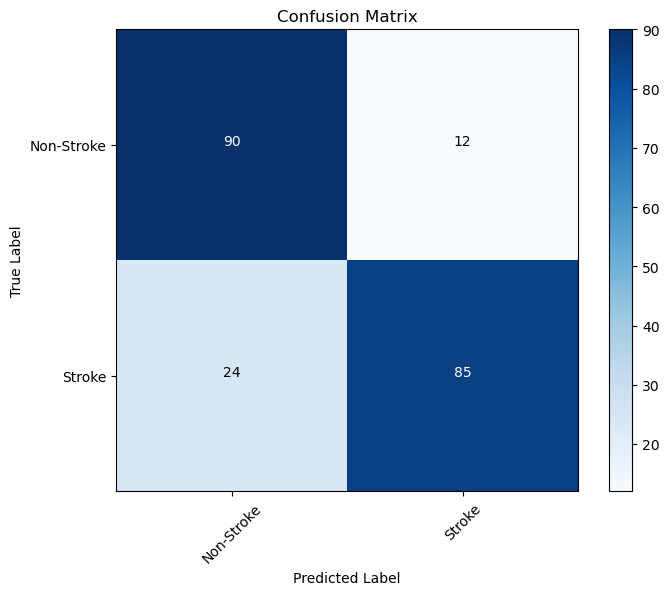

In [13]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display values in each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

# Save the Model

In [14]:
# Save the model
joblib.dump(gradient_boosting, 'stroke_detection_model.pkl')

['stroke_detection_model.pkl']